In [93]:
print("Hello Raghvendra")

Hello Raghvendra


In [94]:
import sys

print(sys.version)

3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

%matplotlib inline







pandas version: 2.2.3
numpy version: 2.2.3
seaborn version: 0.13.2


Business Problem Statement:


AD would like you to investigate whether price sensitivity is the most influential factor for a customer churning,  
and if not, to what extent does price sensitivity influence churn.


Price sensitivity is the degree to which demand changes when the cost of a product or service changes.

In the context of PowerCo, the “demand” refers to the demand for energy consumption.

Price sensitivity is commonly measured using the price elasticity of demand, which states that some consumers won't pay more if a lower-priced option is available.


What is price elasticity of demand?

Price elasticity of demand is a measurement of the change in consumption of a product in relation to a change in its price

Complete the quick knowledge check and move onto your exploratory data analysis.

What is exploratory data analysis?

Exploratory data analysis (EDA) is a technique used by a Data Scientist to gain a holistic understanding of the data that they are working with.

It is mainly based around using statistical techniques (such as descriptive statistics) and visualizations to gain a deeper understanding of the statistical properties that the data holds.

In [96]:
client_df = pd.read_csv("C:\\Users\\Dell\\Downloads\\client_data (1).csv")
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t      0.00   
1      2009-08-21   2015-08-31             189.95  ...        f      0.00   
2      2010-04-16   2015-04-17              47.96  ...        f      0.00   
3      2010-03-30   2015-03-31             240.04  ...        f      0.00   
4      2010-01-13   2015-03-09             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

In [97]:
price_df=pd.read_csv("C:\\Users\\Dell\\Downloads\\price_data (1).csv")
price_df.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [98]:
client_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [99]:
# we see that there are no missing values in the client_df. Let's check for missing values in the price_df

price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [100]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [101]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

In [11]:
def plot_stacked_bars(dataframe, title, size=(18,1), rot=0, legend="upper_right"):
    """ We will use this function to plot stcked bars for the data"""
    ax = dataframe.plot(kind="bar", stacked=True, figsize=size, rot=rot,title=title)

    annotate_stacked_bars(ax, textsize=16)
    plt.legend(["Retention","Churn"], loc=legend)
    plt.ylabel("Compnay base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, color="white", textsize=13):
    """ This function will help to annotate the stacked bars"""
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == '0.0':
            continue
        ax.annotate(value, ((p.get_x() + p.get_width() / 2.) * pad - 0.05, p.get_y() + p.get_height() / 2.),
                    color=color, size=textsize,
                    )

In [12]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

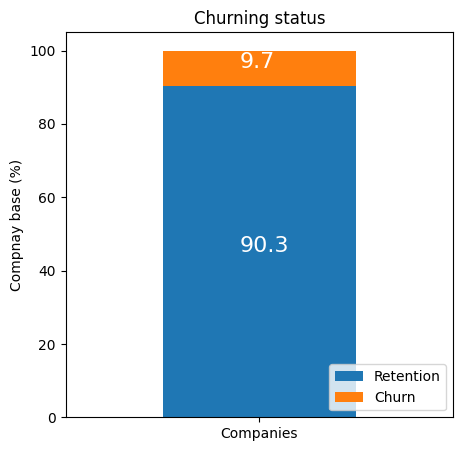

In [13]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend="lower right")


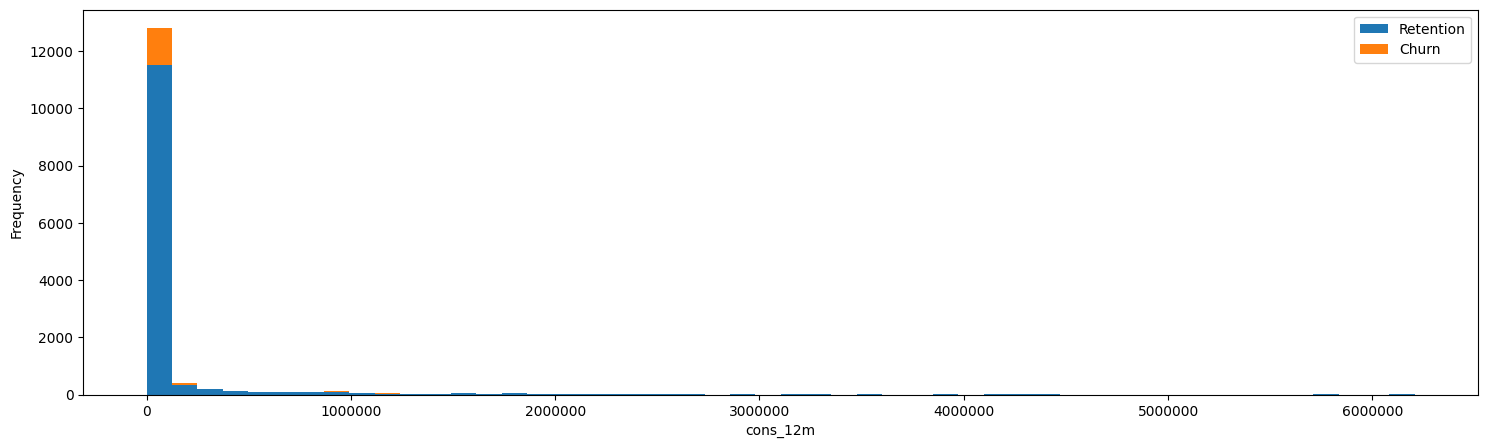

In [14]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

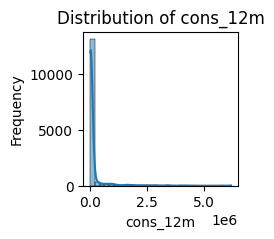

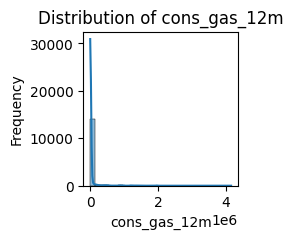

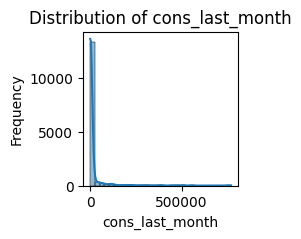

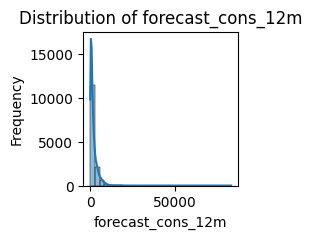

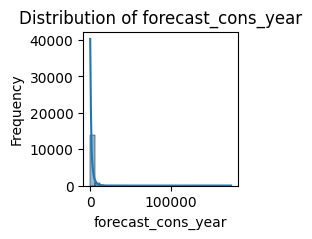

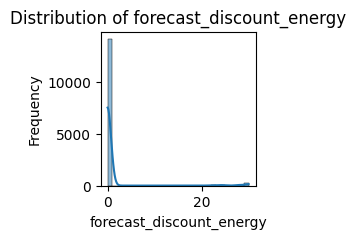

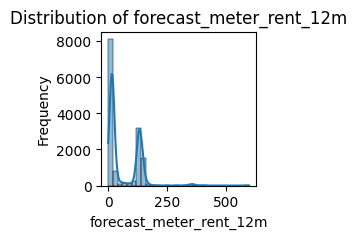

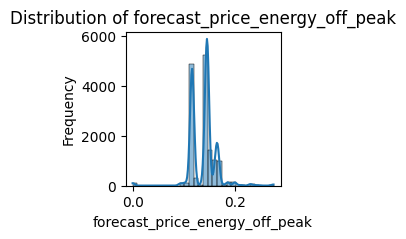

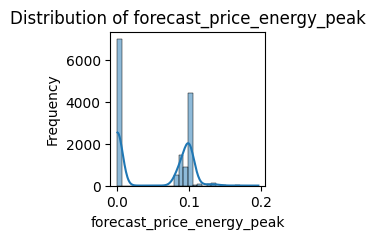

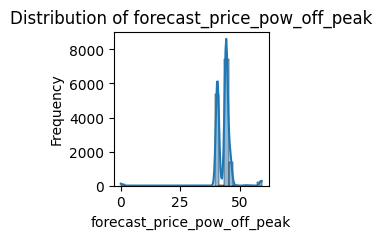

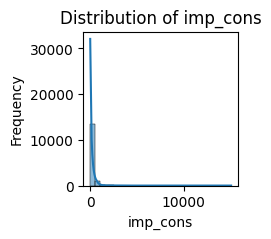

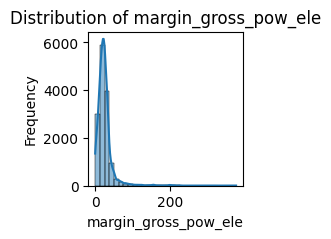

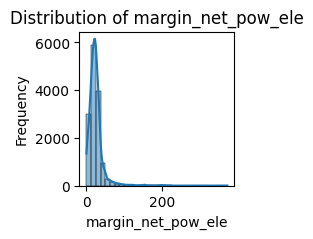

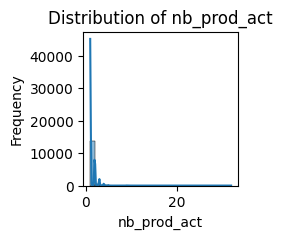

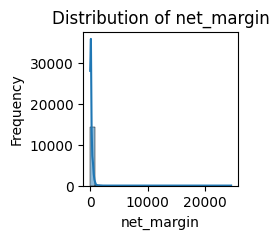

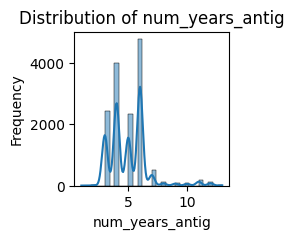

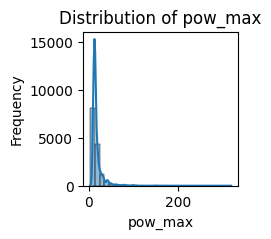

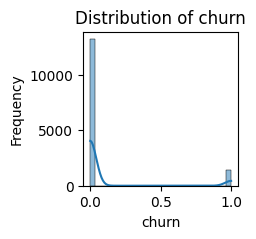

In [15]:
for column in client_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(2, 2))
    sns.histplot(client_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

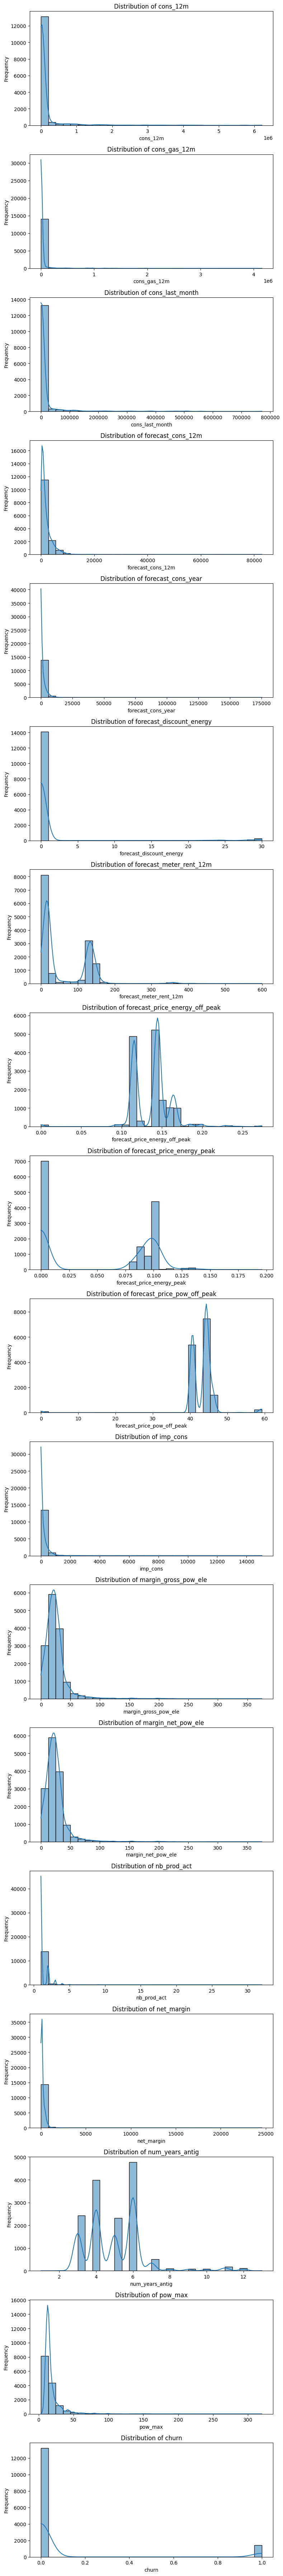

In [16]:
# Select only numeric columns
numeric_cols = client_df.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, 4 * len(numeric_cols)))

# If there's only one numeric column, axes will not be an array, so handle that case
if len(numeric_cols) == 1:
    axes = [axes]

# Loop through numeric columns and plot histograms with density (KDE)
for ax, column in zip(axes, numeric_cols):
    sns.histplot(client_df[column], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [17]:
# Select numerical columns
numeric_cols = client_df.select_dtypes(include=['number']).columns

# Create subplots
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(4 * num_cols, 4 * num_cols))

# Loop through column pairs to create scatter plots
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        ax = axes[i, j]
        if i == j:
            ax.text(0.5, 0.5, col1, fontsize=12, ha='center', va='center')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.scatter(client_df[col2], client_df[col1], alpha=0.5)
            ax.set_xlabel(col2)
            ax.set_ylabel(col1)

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

Now it’s time for feature engineering
Well done for your analysis on the influence of price sensitivity relative to churn!

Estelle reviewed your work with the AD and Estelle has come up with an idea to enrich the dataset when trying to predict churn:

“I think that the difference between off-peak prices in December and January the preceding year could be a significant feature when predicting churn”

What is feature engineering?
Feature engineering refers to:

Addition
Deletion
Combination
Mutation
of your data set to improve machine learning model training, leading to better performance and greater accuracy.

In [102]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\client_data (1).csv")
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  

[3 rows x 26 columns]

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [104]:
#wehave 7 categorical values and 17 numerical values

df_num = df.select_dtypes(include=['float64', "int64"])
df_num.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cons_12m                        14606 non-null  int64  
 1   cons_gas_12m                    14606 non-null  int64  
 2   cons_last_month                 14606 non-null  int64  
 3   forecast_cons_12m               14606 non-null  float64
 4   forecast_cons_year              14606 non-null  int64  
 5   forecast_discount_energy        14606 non-null  float64
 6   forecast_meter_rent_12m         14606 non-null  float64
 7   forecast_price_energy_off_peak  14606 non-null  float64
 8   forecast_price_energy_peak      14606 non-null  float64
 9   forecast_price_pow_off_peak     14606 non-null  float64
 10  imp_cons                        14606 non-null  float64
 11  margin_gross_pow_ele            14606 non-null  float64
 12  margin_net_pow_ele              

In [105]:
df_cat = df.select_dtypes(include=['object'])
df_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               14606 non-null  object
 1   channel_sales    14606 non-null  object
 2   date_activ       14606 non-null  object
 3   date_end         14606 non-null  object
 4   date_modif_prod  14606 non-null  object
 5   date_renewal     14606 non-null  object
 6   has_gas          14606 non-null  object
 7   origin_up        14606 non-null  object
dtypes: object(8)
memory usage: 913.0+ KB


In [106]:
def UniqueValue(dataframe):
    for column in dataframe.columns:
        print(f'{column} : {dataframe[column].unique()}')

In [107]:
#Lets count the number of unique values in the data

for column in df.columns:
    print(f'{column} : {df[column].nunique()}')

id : 14606
channel_sales : 8
cons_12m : 11065
cons_gas_12m : 2112
cons_last_month : 4751
date_activ : 1796
date_end : 368
date_modif_prod : 2129
date_renewal : 386
forecast_cons_12m : 13993
forecast_cons_year : 4218
forecast_discount_energy : 12
forecast_meter_rent_12m : 3528
forecast_price_energy_off_peak : 516
forecast_price_energy_peak : 329
forecast_price_pow_off_peak : 41
has_gas : 2
imp_cons : 7752
margin_gross_pow_ele : 2391
margin_net_pow_ele : 2391
nb_prod_act : 10
net_margin : 11965
num_years_antig : 13
origin_up : 6
pow_max : 698
churn : 2


<Axes: >

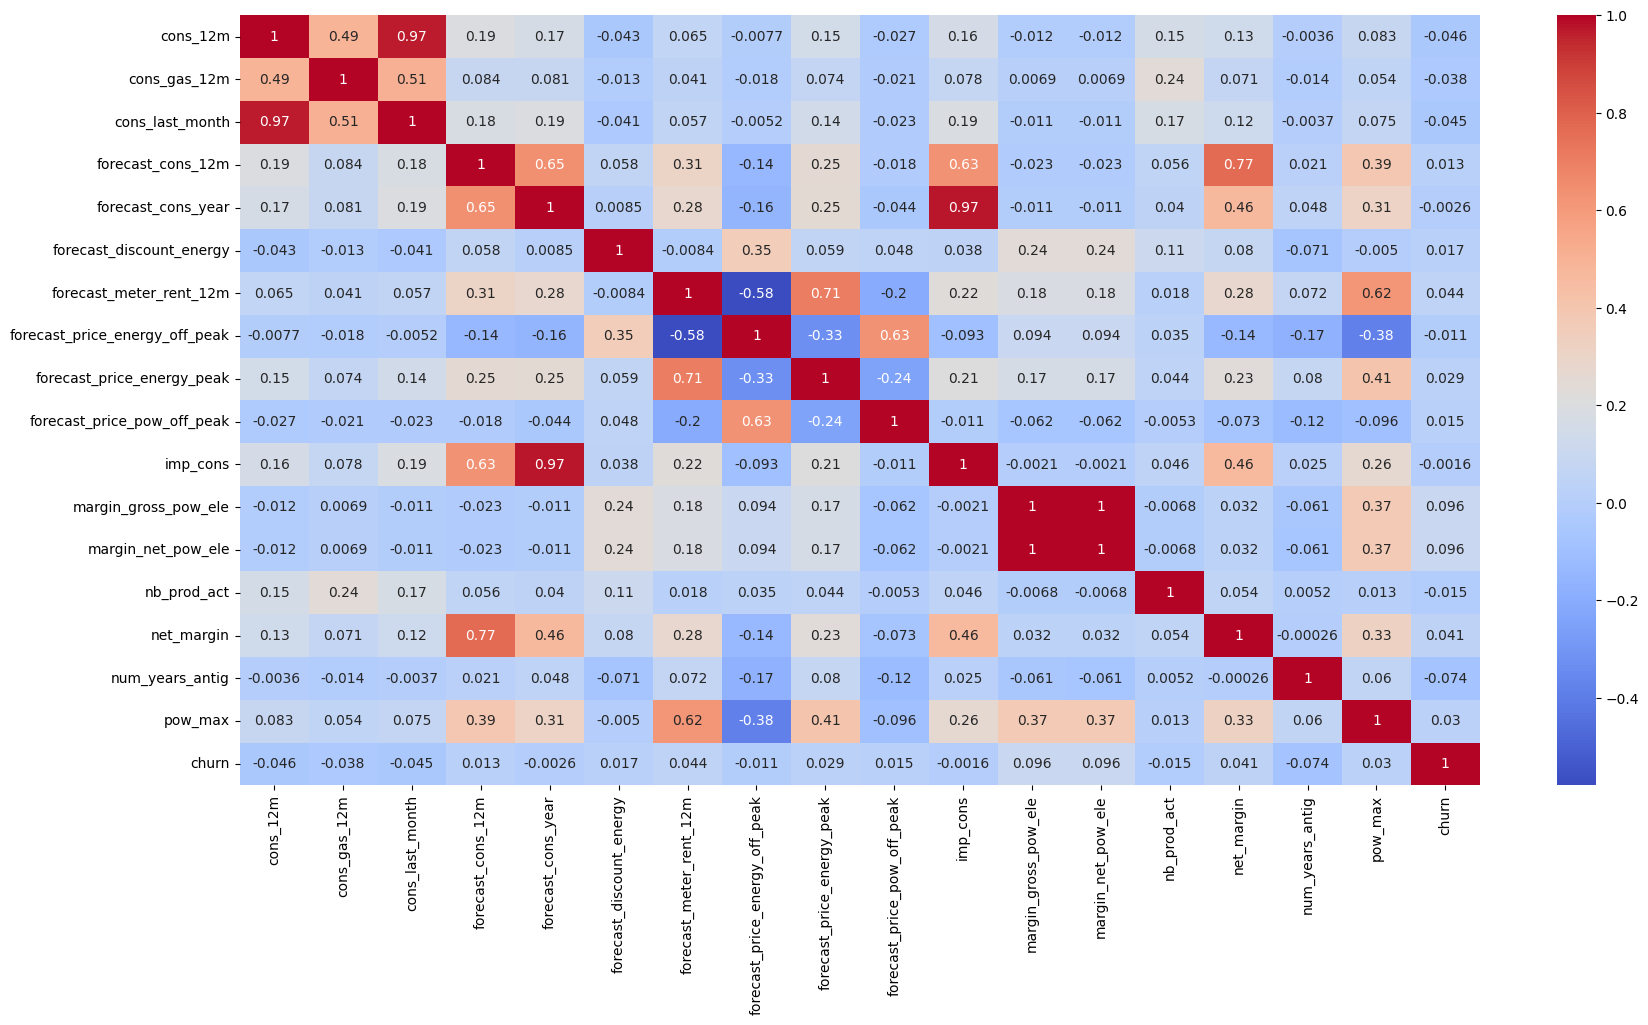

In [108]:
#lets create a correlation matrix to identify key features that are correlated with each other

correlation = df_num.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')




In [109]:
#lets check the correlation of the churn column with the other columns

correlation['churn'].sort_values(ascending=False)



churn                             1.000000
margin_net_pow_ele                0.095772
margin_gross_pow_ele              0.095725
forecast_meter_rent_12m           0.044245
net_margin                        0.041135
pow_max                           0.030362
forecast_price_energy_peak        0.029315
forecast_discount_energy          0.017026
forecast_price_pow_off_peak       0.014778
forecast_cons_12m                 0.012949
imp_cons                         -0.001583
forecast_cons_year               -0.002558
forecast_price_energy_off_peak   -0.010837
nb_prod_act                      -0.014930
cons_gas_12m                     -0.037957
cons_last_month                  -0.045284
cons_12m                         -0.045968
num_years_antig                  -0.074140
Name: churn, dtype: float64

In [63]:
#lets check the distribution of the churn column

df['churn'].value_counts()

#lets check the distribution of the churn column

df['churn'].value_counts(normalize=True)

churn
0    0.902848
1    0.097152
Name: proportion, dtype: float64

In [65]:
#Lets convert the date time data into date time format
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

---

## Feature engineering

### Difference between off-peak prices in December and preceding January


In [163]:
price_df = pd.read_csv("C:\\Users\\Dell\\Downloads\\price_data (1).csv")
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [164]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [165]:


for i in price_df.columns:
    print(f'{i} : {price_df[i].nunique()}')

id : 16096
price_date : 12
price_off_peak_var : 1853
price_peak_var : 1189
price_mid_peak_var : 711
price_off_peak_fix : 66
price_peak_fix : 31
price_mid_peak_fix : 28


In [166]:
# Nea Feature:

# we can remove features which are not highly correlated with the churn.
df_new = df.drop([
    "forecast_price_energy_peak",
    "forecast_discount_energy",
    "forecast_price_pow_off_peak",
    "forecast_cons_12m",
    "imp_cons",
    "forecast_cons_year",
    "forecast_price_energy_off_peak",
    "nb_prod_act"
], axis=1)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               14606 non-null  object 
 1   channel_sales                    14606 non-null  object 
 2   cons_12m                         14606 non-null  int64  
 3   cons_gas_12m                     14606 non-null  int64  
 4   cons_last_month                  14606 non-null  int64  
 5   date_activ                       14606 non-null  object 
 6   date_end                         14606 non-null  object 
 7   date_modif_prod                  14606 non-null  object 
 8   date_renewal                     14606 non-null  object 
 9   forecast_meter_rent_12m          14606 non-null  float64
 10  has_gas                          14606 non-null  object 
 11  margin_gross_pow_ele             14606 non-null  float64
 12  margin_net_pow_ele

In [167]:
#lets check the distribution of the churn column

df_new['churn'].value_counts()

#lets check the distribution of the churn column

df_new['churn'].value_counts(normalize=True)

churn
0    0.902848
1    0.097152
Name: proportion, dtype: float64

In [168]:
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [169]:
price_df["date"]= price_df['price_date'].dt.dayofweek
price_df["month"]= price_df['price_date'].dt.month
price_df["year"]= price_df['price_date'].dt.year


In [170]:
price_df[["date", "month","year"]].head


<bound method NDFrame.head of         date  month  year
0          3      1  2015
1          6      2  2015
2          6      3  2015
3          2      4  2015
4          4      5  2015
...      ...    ...   ...
192997     5      8  2015
192998     1      9  2015
192999     3     10  2015
193000     6     11  2015
193001     1     12  2015

[193002 rows x 3 columns]>

In [171]:
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  date  month  year  
0                 0.0     3      1  2015  
1                 0.0     6      2  2015  
2                 0.0     6      3  2015  
3                 0.0     2      4  2015  
4                 0.0     4      5  2015

In [172]:
for i in price_df.columns:
    print(f'{i} : {price_df[i].nunique()}')

id : 16096
price_date : 12
price_off_peak_var : 1853
price_peak_var : 1189
price_mid_peak_var : 711
price_off_peak_fix : 66
price_peak_fix : 31
price_mid_peak_fix : 28
date : 7
month : 12
year : 1


In [173]:
print(price_df.id.sort_values())
print(df_new.id.sort_values())

72174     0002203ffbb812588b632b9e628cc38d
72173     0002203ffbb812588b632b9e628cc38d
72172     0002203ffbb812588b632b9e628cc38d
72171     0002203ffbb812588b632b9e628cc38d
72170     0002203ffbb812588b632b9e628cc38d
                        ...               
115462    ffff7fa066f1fb305ae285bb03bf325a
115463    ffff7fa066f1fb305ae285bb03bf325a
115464    ffff7fa066f1fb305ae285bb03bf325a
115460    ffff7fa066f1fb305ae285bb03bf325a
115454    ffff7fa066f1fb305ae285bb03bf325a
Name: id, Length: 193002, dtype: object
7791     0002203ffbb812588b632b9e628cc38d
3446     0004351ebdd665e6ee664792efc4fd13
400      0010bcc39e42b3c2131ed2ce55246e3c
5794     00114d74e963e47177db89bc70108537
9852     0013f326a839a2f6ad87a1859952d227
                       ...               
6762     ffebf6a979dd0b17a41076df1057e733
10854    fffac626da707b1b5ab11e8431a4d0a2
7125     fffc0cacd305dd51f316424bbb08d1bd
12641    fffe4f5646aa39c7f97f95ae2679ce64
7082     ffff7fa066f1fb305ae285bb03bf325a
Name: id, Length: 14606, 

In [174]:
price_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'date', 'month', 'year'],
      dtype='object')

In [175]:
grouped_df = price_df.groupby('id', as_index=False)[[
    'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 
    'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'
]].mean()
grouped_df.head()

id  price_off_peak_var  price_peak_var  \
0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4  00114d74e963e47177db89bc70108537            0.147926        0.000000   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
0            0.073160           40.701732       24.421038           16.280694  
1            0.000000           44.385450        0.000000            0.000000  
2            0.000000           45.319710        0.000000            0.000000  
3            0.069032           40.647427       24.388455           16.258971  
4            0.000000           44.266930        0.000000            0.000000

In [176]:

#merge both data set

df_new = pd.merge(df_new, grouped_df, on='id', how='left')
df_new.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_meter_rent_12m  ...  \
0      2015-11-01   2015-06-23                     1.78  ...   
1      2009-08-21   2015-08-31                    16.27  ...   
2      2010-04-16   2015-04-17                    38.72  ...   
3      2010-03-30   2015-03-31                    19.83  ...   
4      2010-01-13   2015-03-09                   131.73  ...   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   price_off_peak_var price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0            0.124787       0.100749            0.066530           40.942265   
1            0.149609       0.007124            0.000000           44.311375   
2            0.170512       0.088421            0.000000           44.385450   
3            0.151210       0.000000            0.000000           44.400265   
4            0.124174       0.103638            0.072865           40.688156   

   price_peak_fix  price_mid_peak_fix  
0       22.352010           14.901340  
1        0.000000            0.000000  
2        0.000000            0.000000  
3        0.000000            0.000000  
4       24.412893           16.275263  

[5 rows x 30 columns]

Here is some context around the additional features that have been engineered in the notebook, to help you in the future:

Firstly we have the average price changes across periods. This is a measure of the average price change by company between peak, mid-peak and off peak periods. 

We then take this idea one step further by creating another similar feature but instead of looking at the average price difference, we look at the maximum price difference across periods and months. This gives another way to look at the price changes across months.

The reason why these 2 features could be useful is because they are another way of representing the variance of prices throughout the year. Imagine, if your utilities bill massively increased over winter, as a consumer you’d be annoyed and want to find a better deal!

After this we continue feature engineering with some more concepts, including transformation of columns.
To make predictions with a statistical or machine learning algorithm, all of the data must be converted to numeric data types.

Therefore, we convert date into months and remove the raw date column, as we cannot use it in its original form.
We also convert boolean columns into binary values.

And we convert categorical columns into dummy variables. A dummy variable is a binary flag that indicates when a row matches the value from the categorical column that it was created from.

As we saw during exploratory data analysis, the distribution of some columns was skewed. This is important to identify because when modeling data for prediction, based on the technique or algorithm that we use, there are sometimes assumptions within the data that we should follow.

One common assumption is that the columns within the data are normally distributed. Hence, if we find that columns are not normally distributed, we should treat these columns to try and transform them into a distribution that is more normal.
Therefore, the next thing we do is transform some columns to have a closer to normal distribution. We do this using the logarithm function. As you can see from the visualisations, the newly transformed columns are much closer to a normal distribution than what they were earlier.

Finally, we plot correlations of all the columns to see if we can identify any columns to remove. Columns that have very high correlations indicate an area to look out for. In this case, you may want to remove one of the columns, since they are likely both holding very similar information.

---

## Average price changes across periods

We can now enhance the feature that our colleague made by calculating the average price changes across individual periods, instead of the entire year.

In [177]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [178]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [189]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  num_years_antig  \
0      2015-11-01   2015-06-23               0.00  ...                3   
1      2009-08-21   2015-08-31             189.95  ...                6   
2      2010-04-16   2015-04-17              47.96  ...                6   
3      2010-03-30   2015-03-31             240.04  ...                6   
4      2010-01-13   2015-03-09             445.75  ...                6   

                          origin_up  pow_max  churn  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 32 columns]

Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`). The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.


## Max price changes across periods and months

Another way we can enhance the feature from our colleague is to look at the maximum change in prices across periods and months.

In [190]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [191]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [192]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [193]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.146033                           44.266930   
1                               0.151367                           44.444710   
2                               0.172468                           44.444710   
3                               0.153133                           44.444710   
4                               0.055866                           16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 38 columns]

I thought that calculating the maximum price change between months and time periods would be a good feature to create because I was trying to think from the perspective of a PowerCo client. As a Utilities customer, there is nothing more annoying than sudden price changes between months, and a large increase in prices within a short time span would be an influencing factor in causing me to look at other utilities providers for a better deal. Since we are trying to predict churn for this use case, I thought this would be an interesting feature to include.

---

## (BONUS) Further feature engineering

This section covers extra feature engineering that you may have thought of, as well as different ways you can transform your data to account for some of its statistical properties that we saw before, such as skewness.

### Tenure

How long a company has been a client of PowerCo.

In [214]:
#Lets convert the date time data into date time format
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [215]:


# Calculate tenure (difference in years)
df['tenure'] = ((df['date_end'] - df['date_activ']) / np.timedelta64(1, 'W')) / 52

# Handle missing values before converting to int
df['tenure'] = df['tenure'].fillna(0).astype(int)

# Display the first few rows
print(df[['date_activ', 'date_end', 'tenure']].head())


  date_activ   date_end  tenure
0 2013-06-15 2016-06-15       3
1 2009-08-21 2016-08-30       7
2 2010-04-16 2016-04-16       6
3 2010-03-30 2016-03-30       6
4 2010-01-13 2016-03-07       6


In [216]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(365.25, 'D')).astype(int)

ValueError: Could not convert object to NumPy timedelta

In [217]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
2       0.157895
3       0.143994
4       0.127327
13      0.095238
5       0.092194
12      0.090226
7       0.076187
6       0.075450
11      0.054348
8       0.046154
10      0.040000
9       0.013699

We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer. 

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

### Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [218]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [223]:
from datetime import datetime

# Create reference date
reference_date = datetime(2016, 1, 1)

# Function to convert dates to months difference
def convert_months(ref_date, df, col_name):
    return ((df[col_name] - ref_date) / np.timedelta64(30, 'D')).astype(int)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

# Display result
print(df[['date_activ', 'months_activ', 'date_end', 'months_to_end']].head())


  date_activ  months_activ   date_end  months_to_end
0 2013-06-15           -31 2016-06-15             -5
1 2009-08-21           -77 2016-08-30             -8
2 2010-04-16           -69 2016-04-16             -3
3 2010-03-30           -70 2016-03-30             -2
4 2010-01-13           -72 2016-03-07             -2


Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power. 

Using intuition, you could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the `months_activ` feature.

As well as this, if we think from the perspective of a client with PowerCo, if you're coming toward the end of your contract with PowerCo your thoughts could go a few ways. You could be looking for better deals for when your contract ends, or you might want to see out your contract and sign another one. One the other hand if you've only just joined, you may have a period where you're allowed to leave if you're not satisfied. Furthermore, if you're in the middle of your contract, their may be charges if you wanted to leave, deterring clients from churning mid-way through their agreement. So, I think `months_to_end` will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe `months_modif_prod` will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe `months_renewal` will be a good feature to include.

In [224]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  off_peak_peak_fix_max_monthly_diff  \
0                        0.114481  ...                           44.266930   
1                        0.145711  ...                           44.444710   
2                        0.165794  ...                           44.444710   
3                        0.146694  ...                           44.444710   
4                        0.116900  ...                           16.291555   

   peak_mid_peak_fix_max_monthly_diff off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                               44.26693   
1                            0.000000                               44.44471   
2                            0.000000                               44.44471   
3                            0.000000                               44.44471   
4                            8.145775                               24.43733   

   tenure  year_activ  year_end  months_activ  months_to_end  \
0       3        2013      2016           -31             -5   
1       7        2009      2016           -77             -8   
2       6        2010      2016           -69             -3   
3       6        2010      2016           -70             -2   
4       6        2010      2016           -72             -2   

   months_modif_prod months_renewal  
0                 -2             -6  
1                -77             -4  
2                -69             -8  
3                -70             -9  
4                -72             -9  

[5 rows x 41 columns]

### Transforming Boolean data

#### has_gas

We simply want to transform this column from being categorical to being a binary flag

In [225]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

C:\Users\Dell\AppData\Local\Temp\ipykernel_15000\3416244719.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])


churn
has_gas          
0        0.100544
1        0.081856

If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. Hence, this is a useful feature.

### Transforming categorical data

A predictive model cannot accept categorical or `string` values, hence as a data scientist you need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present `0 < 1 < 2 < 3 ...`

Another way to encode categorical features is to use `dummy variables` AKA `one hot encoding`. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

#### channel_sales

In [226]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.

In [227]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  year_end  months_activ  months_to_end  \
0                    0.098142  ...      2016           -31             -5   
1                    0.000000  ...      2016           -77             -8   
2                    0.087899  ...      2016           -69             -3   
3                    0.000000  ...      2016           -70             -2   
4                    0.100015  ...      2016           -72             -2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                 -2              -6            False   
1                -77              -4             True   
2                -69              -8            False   
3                -70              -9            False   
4                -72              -9             True   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 45 columns]

#### origin_up

In [228]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [229]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                 -2              -6   
1                    0.000000  ...                -77              -4   
2                    0.087899  ...                -69              -8   
3                    0.000000  ...                -70              -9   
4                    0.100015  ...                -72              -9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 47 columns]

### Transforming numerical data

In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed. 

Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root
- Cubic root
- Logarithm

to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

<b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [230]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

We can see that the standard deviation for most of these features is quite high.

In [235]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [236]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       0.037638      0.006816         0.023103           0.032905   
std        0.004175      0.014662         0.016852           0.005623   
min        0.000000      0.000000         0.000000           0.000000   
25%        0.036619      0.000000         0.000000           0.032401   
50%        0.037873      0.000000         0.033338           0.033972   
75%        0.039175      0.000000         0.035842           0.035296   
max        0.043810      0.043508         0.042130           0.039967   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             0.019580                  0.966726                 0.023920   
std              0.016853                  5.108289                 0.006656   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 0.022477   
50%              0.031424                  0.000000                 0.023075   
75%              0.034765                  0.000000                 0.029313   
max              0.040744                 30.000000                 0.032790   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

Let's quickly check the distributions of some of these features too.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15000\3336105285.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
C:\Users\Dell\AppData\Local\Temp\ipykernel_15000\3336105285.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12

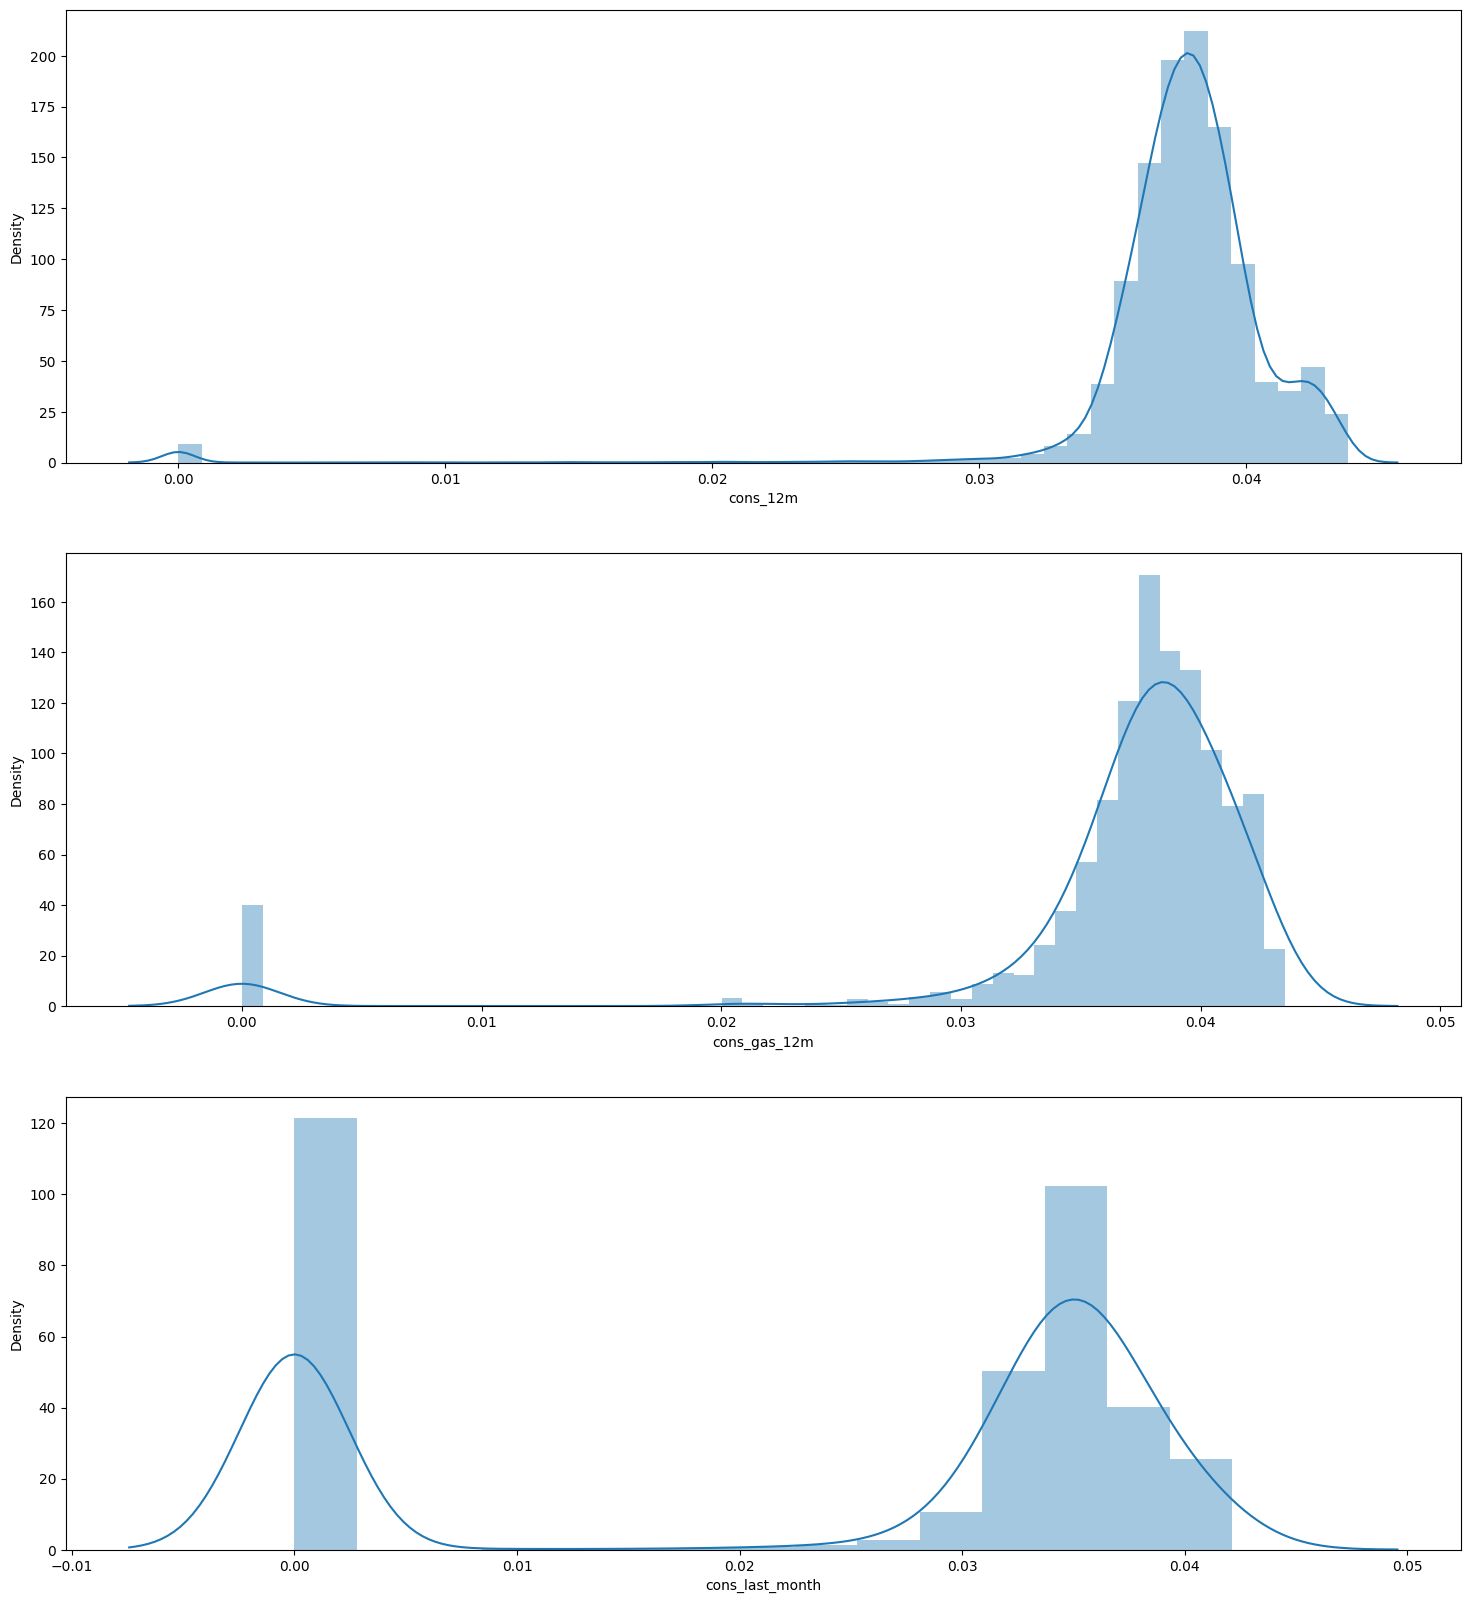

In [237]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

### Correlations

In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model. 

For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

This is important because it reveals the linear relationships between features. We want features to correlate with `churn`, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 

Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

So now let's look at how all the features within the model are correlated.

In [238]:
correlation = df.corr()

ValueError: could not convert string to float: '24011ae4ebbe3035111d65fa7c15bc57'

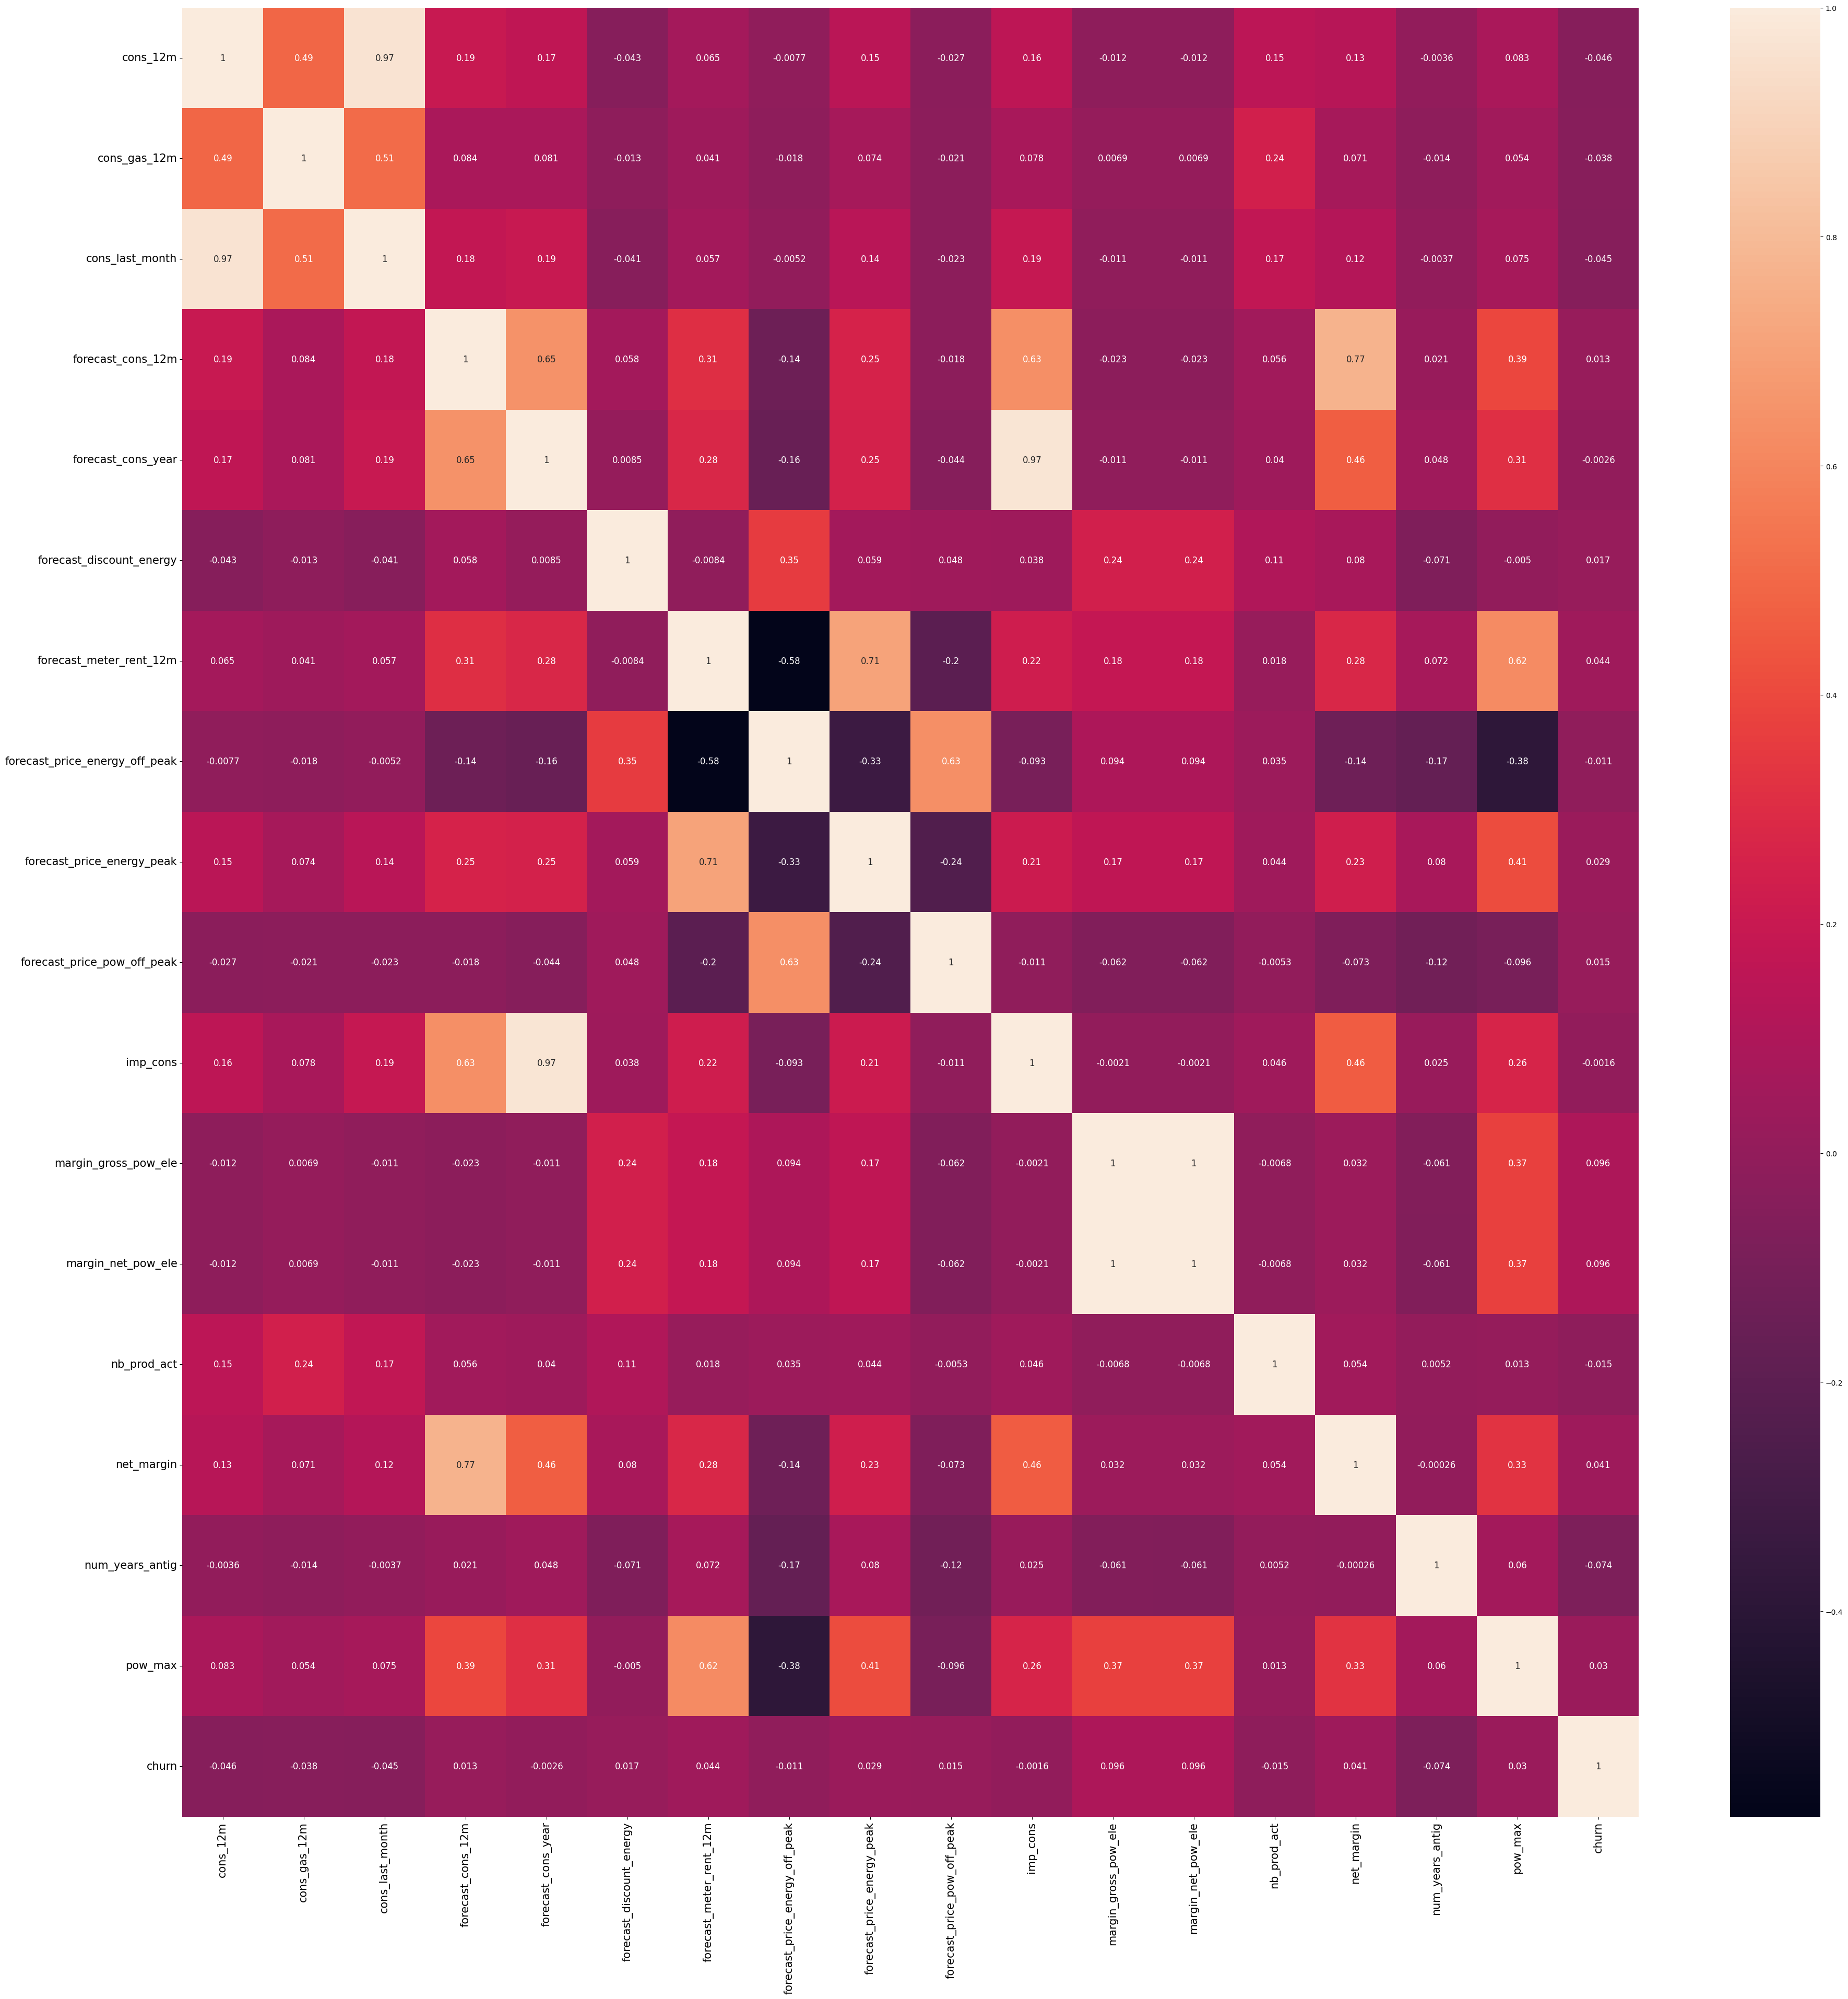

In [239]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [240]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      0.039515         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  0.036329      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  0.032595      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  0.034598      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  0.036252      0.000000         0.032526   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.011598   
1           0.030251                       0.0                 0.022499   
2           0.026401                       0.0                 0.025699   
3           0.030810                       0.0                 0.023284   
4           0.032183                       0.0                 0.029326   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                 -2              -6   
1                    44.311378  ...                -77              -4   
2                    44.311378  ...                -69              -8   
3                    44.311378  ...                -70              -9   
4                    40.606701  ...                -72              -9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 45 columns]